# Cruise Daily Images

In [2]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

In [13]:
cruise = 'GOM21FA'
cfile = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/'+ cruise +'/MYD021KM.*.hdf')
cfile.sort()

swats = np.unique([f.split('.')[1] for f in cfile])

for file in swats:
    file1 = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/'+ cruise +'/MYD021KM.'+ file +'*.hdf')
    
    for i, file in enumerate(file1):
        time = file.split('.')[2]
        realtime = int(time)
        try:
            if realtime == int(file[i+1].split('.')[2]) + 5 or int(file[i+1].split('.')[2]) - 5:
                print('yes')
            else:
                print('no')
        except:
            pass
            
        



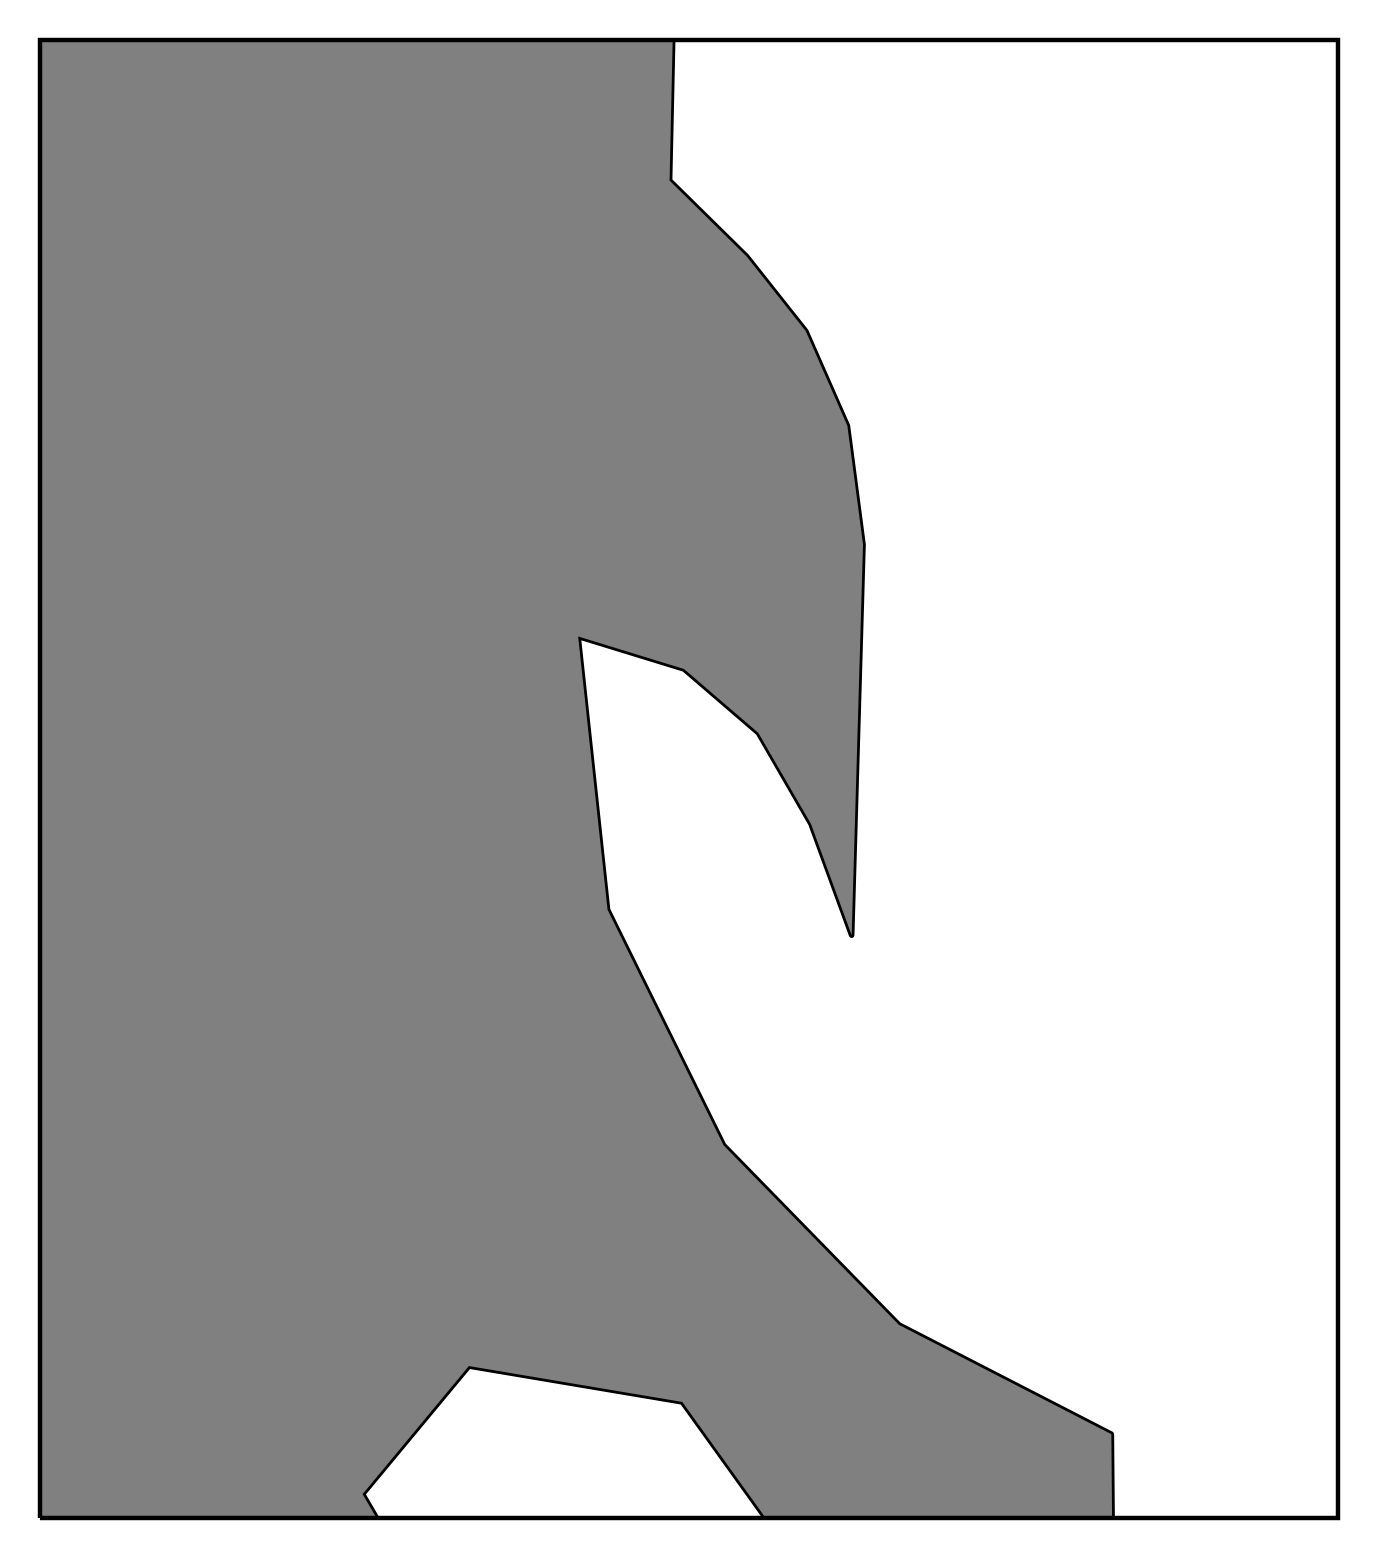

In [2]:
##for Cruise

from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

######

lat_0, lon_0 = 28.5, -90.8

lat_top=29.4
lat_bot=29.3
lon_left=-90.1
lon_rigth=-90



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=400) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent , crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

######
        
        
def Cruisefigure(cruise):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    #loop
    for swat in swats:
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])

        #extract projection and lon lat from products
        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
        lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

        #left true color
        ax1 = plt.subplot(projection=crs)
        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)
        
        plot_mapbase(ax=ax1)


        #title & save
        ax1.set_title('MODIS AQUA - GOMEX; %s' % new_scn.start_time.isoformat()[0:10])
        fig.text(0.035, 0.41, 'Latitude', size=13, rotation=90)
        fig.text(0.435, 0.025, 'Longitude', size=13)
        fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task1/Dailies/' + cruise + '/Cruise%s_rgb.png' 
          % (new_scn.start_time.isoformat()[0:10]))
        fig.clear()
        


In [ ]:
Cruisefigure('GOM22SP')
Cruisefigure('GOM22SU')
Cruisefigure('GOM21SU')
Cruisefigure('GOM21FA')


/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


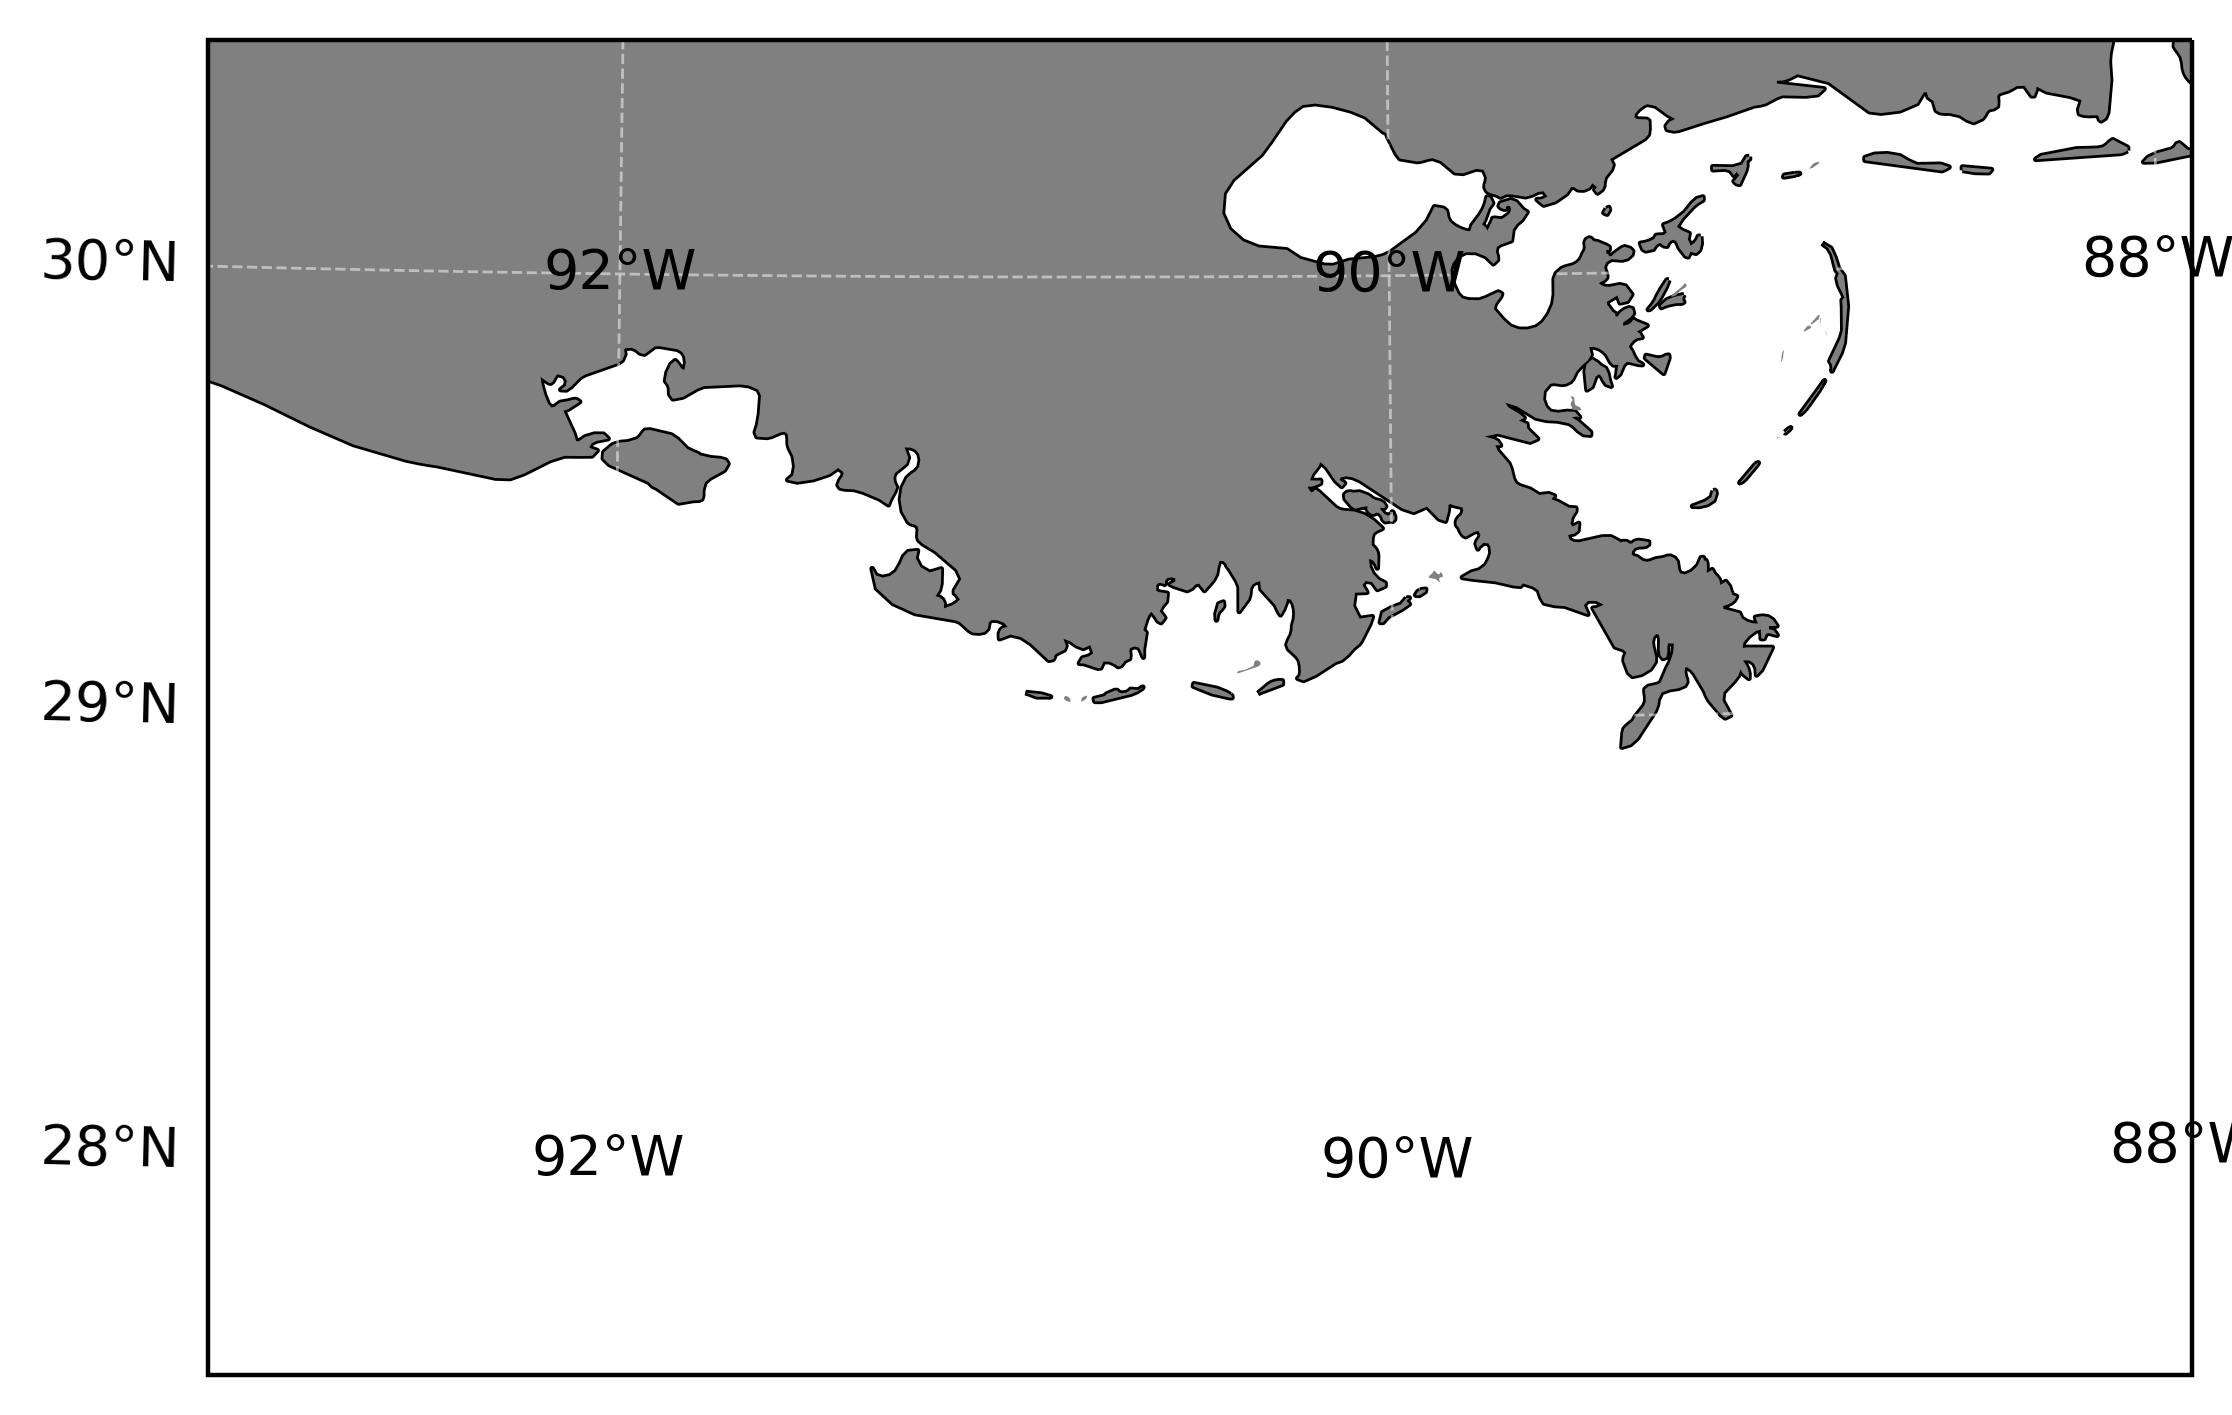

In [26]:
##for Cruise

from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

######

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=400) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent , crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

######
        
        
def Cruisefigure(cruise):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(6, 4), dpi=400)
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    #loop
    for n, swat in enumerate(swats):
        ax1 = axs[n]
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])

        #extract projection and lon lat from products
        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()


        #left true color
#        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)
        
        #plot_mapbase(ax=ax1)
        scn.coastlines(res)


        #title & save
        ax1.set_title('MODIS AQUA - GOMEX; %s' % new_scn.start_time.isoformat()[0:10])
    fig.text(0.035, 0.41, 'Latitude', size=13, rotation=90)
    fig.text(0.435, 0.025, 'Longitude', size=13)
#         fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task1/Dailies/' + cruise + '/Cruise%s_rgb.png' 
#           % (new_scn.start_time.isoformat()[0:10]))
    fig.clear()
        


AttributeError: 'Scene' object has no attribute 'coastlines'

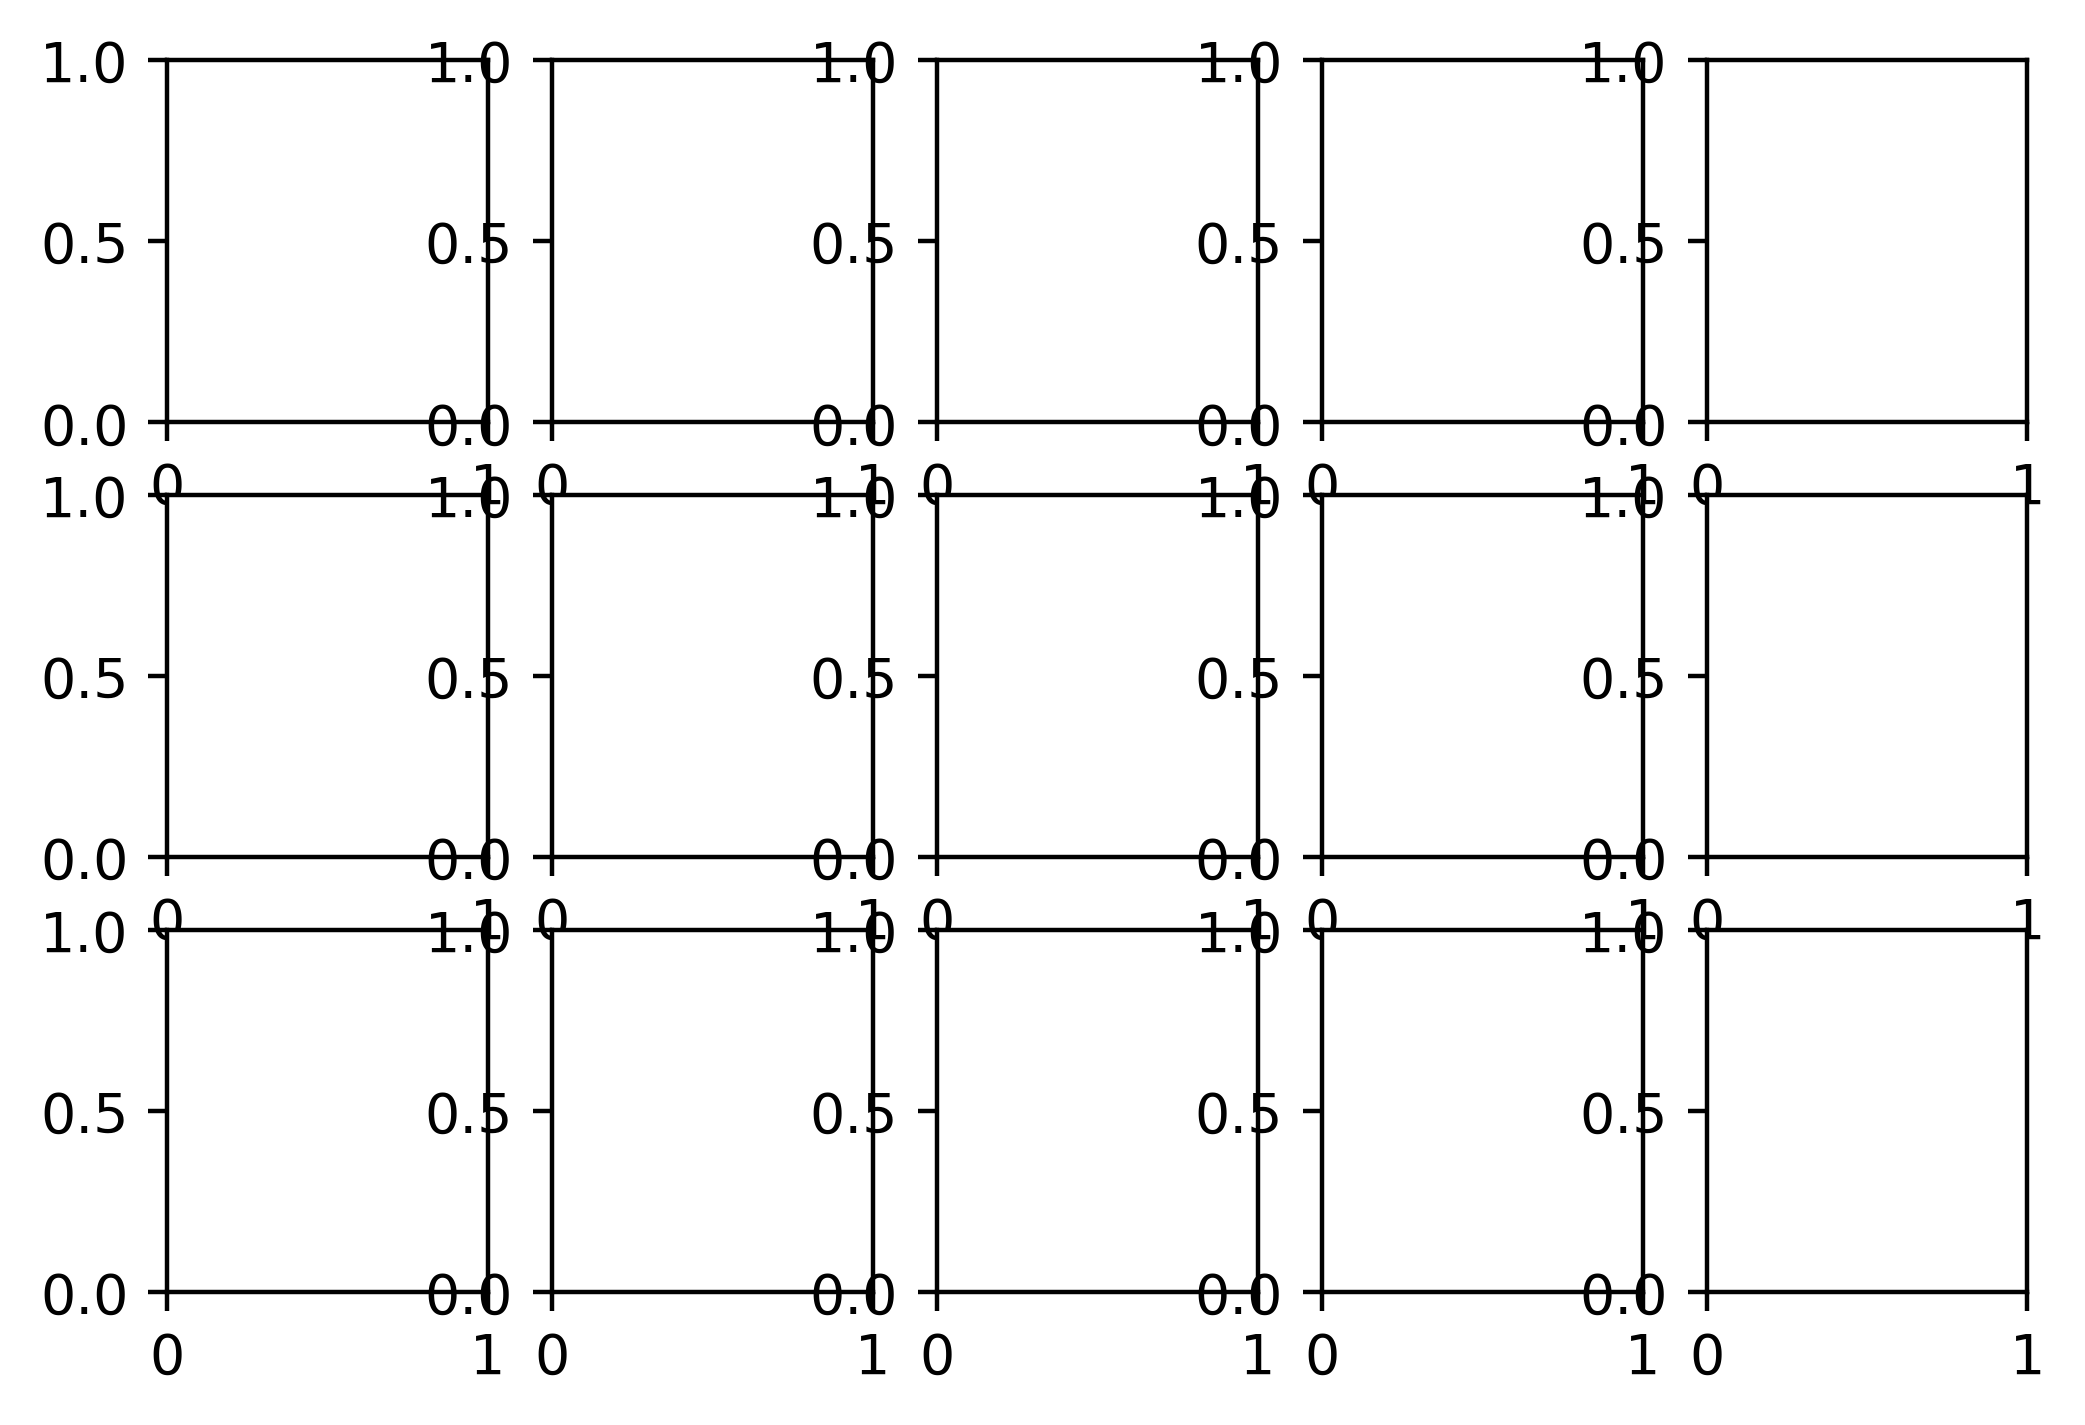

<Figure size 2400x1600 with 0 Axes>

In [27]:
Cruisefigure('GOM22SP')

In [8]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

######

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def Cruisefigure(cruise):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig, axs = plt.subplots(nrows=3, ncols=5, figsize=(6, 4), dpi=400)
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    #loop
    for n, swat in enumerate(swats):
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])
        rgb
        
        
        

        

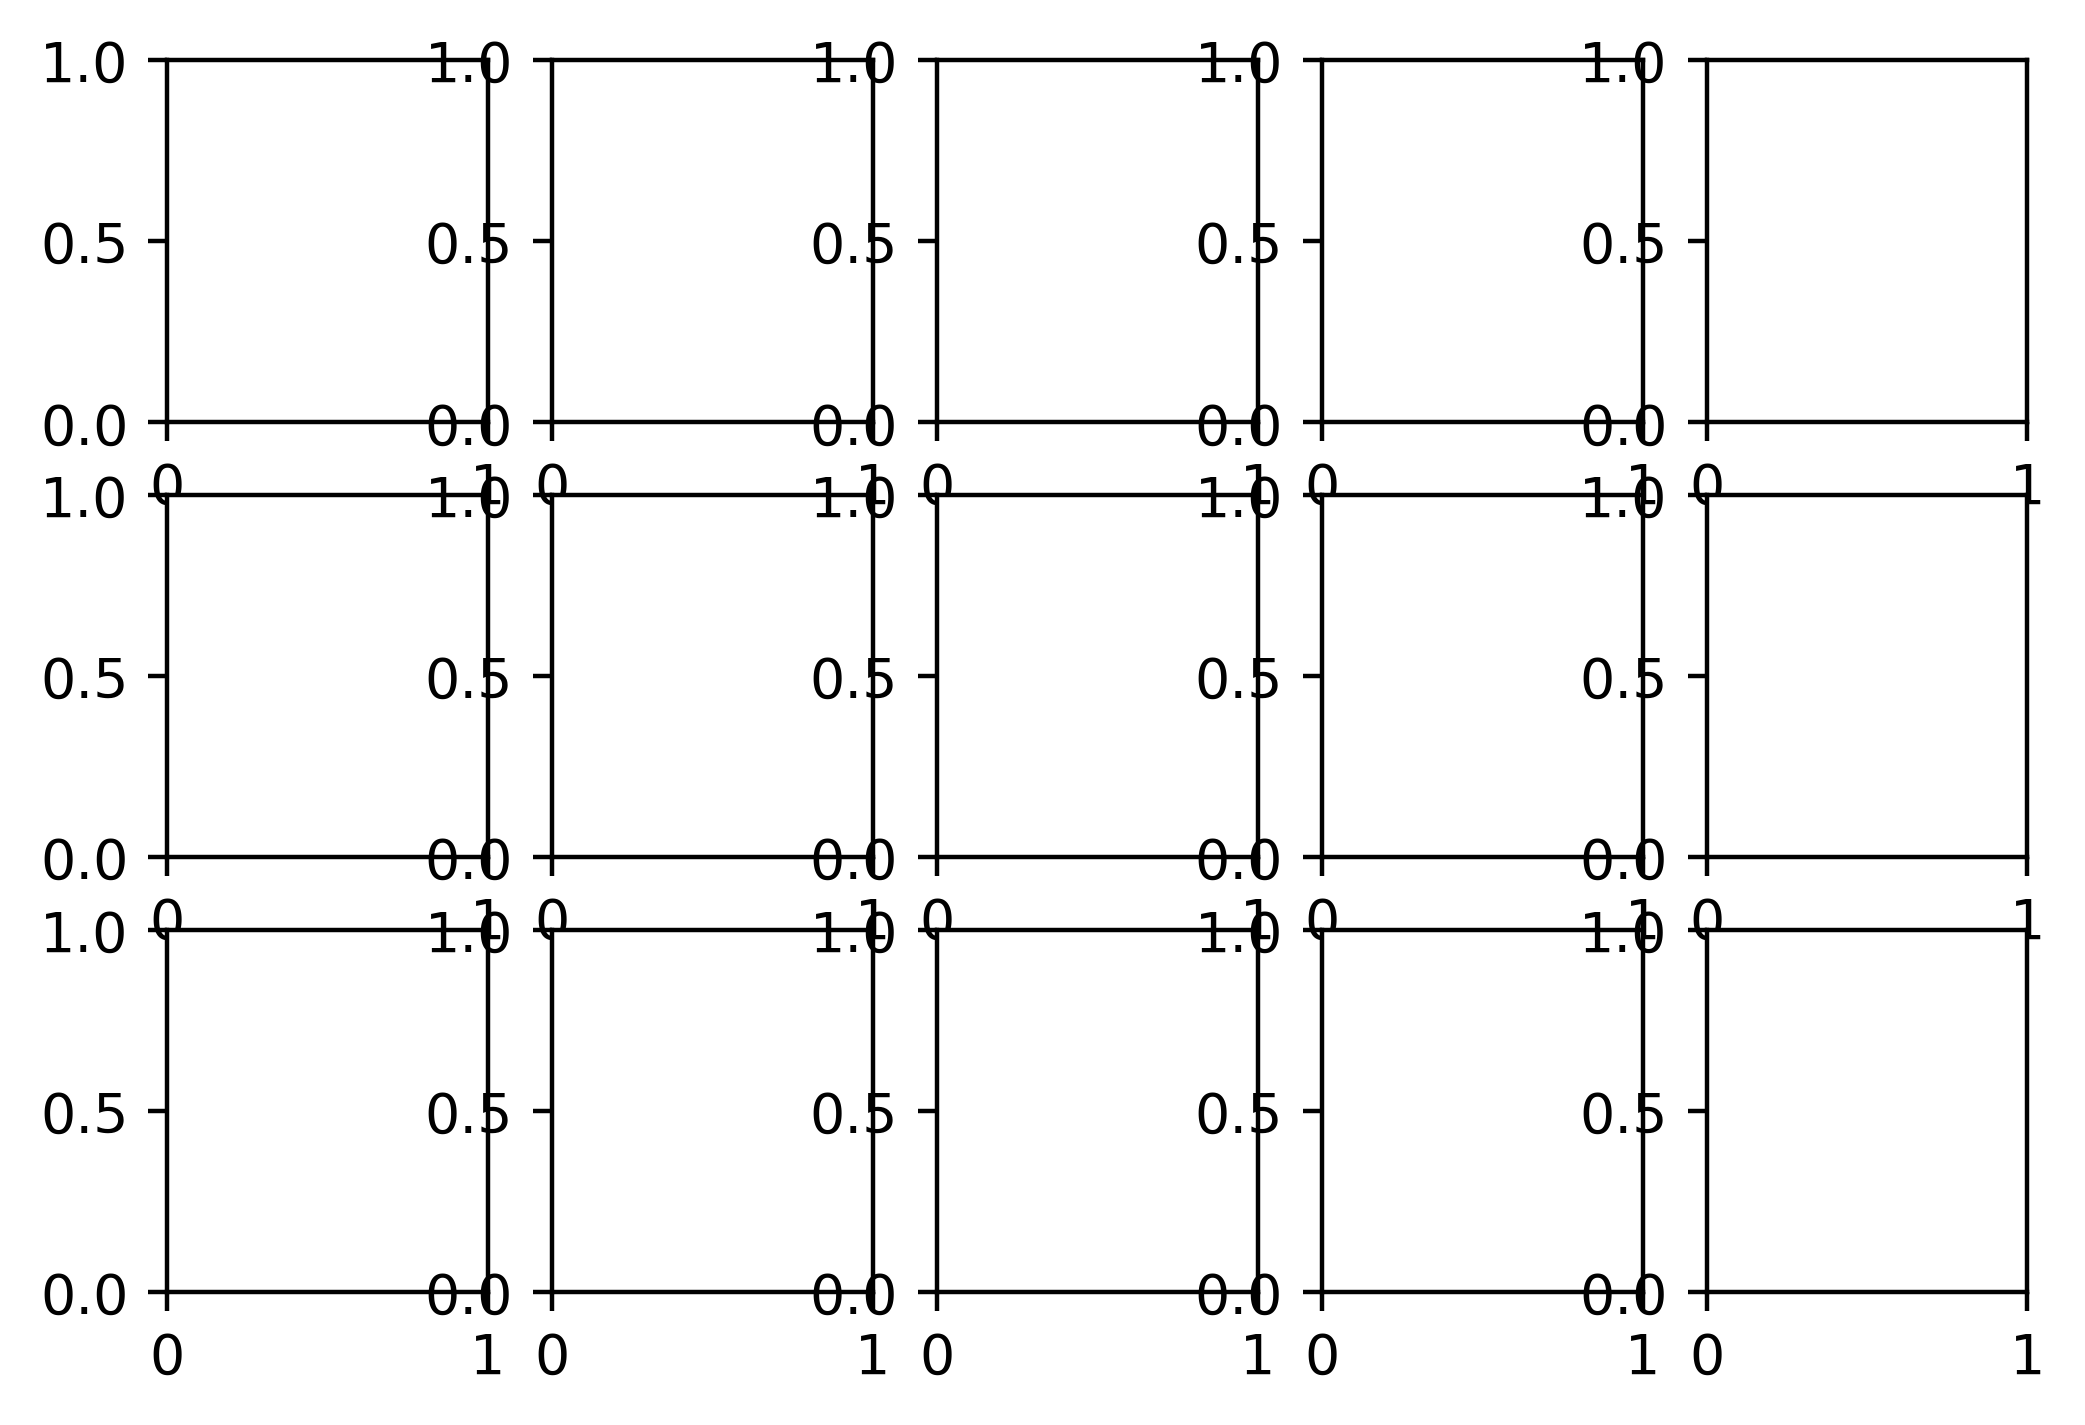

<Figure size 2400x1600 with 0 Axes>

In [9]:
Cruisefigure('GOM22SP')

In [3]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
i=0
base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/GOM22SU/MYD021KM.'

#files to be used
filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/GOM22SU/MYD021KM.*')
swats = np.unique([f.split('.')[1] for f in filenames])
print(swats)

['A2022187' 'A2022188' 'A2022189' 'A2022190' 'A2022191' 'A2022192'
 'A2022193' 'A2022194' 'A2022195' 'A2022196' 'A2022197' 'A2022198'
 'A2022199' 'A2022200' 'A2022201' 'A2022202' 'A2022203' 'A2022204'
 'A2022205' 'A2022206' 'A2022207' 'A2022208' 'A2022209']


# Cruise Animation

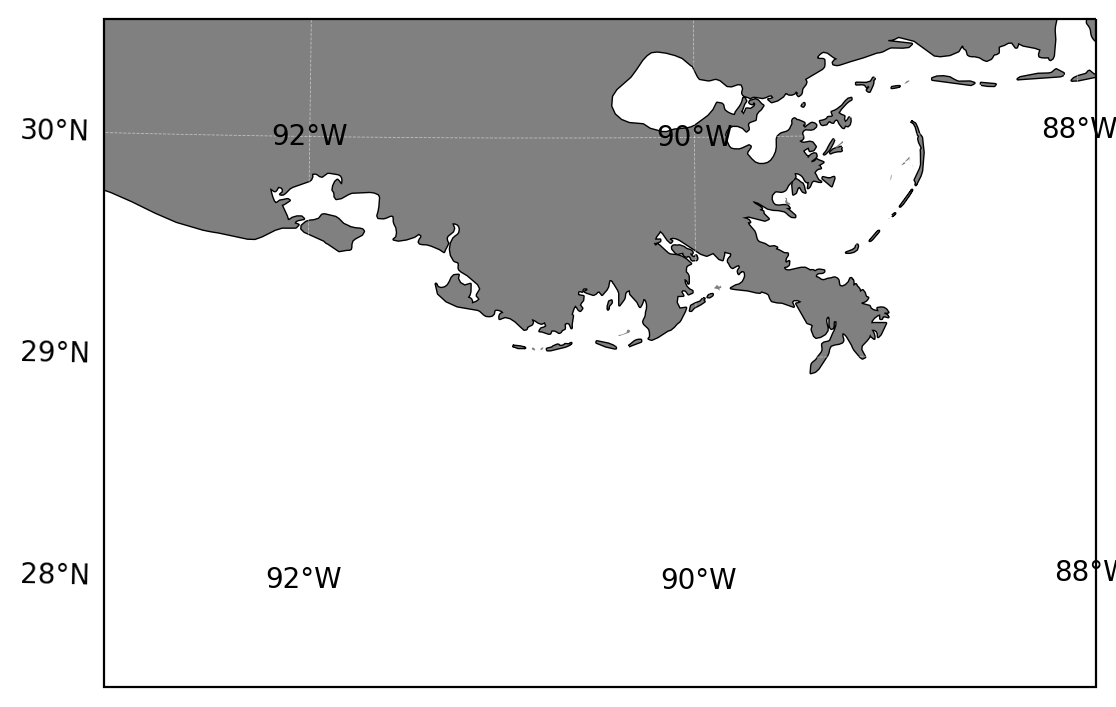

In [46]:
##Cruise Animation

from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from celluloid import Camera
from satpy import MultiScene
from satpy.multiscene import timeseries

#####

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93

extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=400) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent , crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.3, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))


def Cruisefigure(cruise):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/TXLADailies/' + cruise + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    
    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                width=1500, height=750,
                area_extent=extent, units='degrees')    
        
    # for animation
    fig =  plt.figure(figsize=(6, 4), dpi=400)
    camera = Camera(fig)

    #creating animation
    for swat in swats:
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])

        #extract projection and lon lat from products
        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
        lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

        #set up figure size and resolution

        #left true color
        ax1 = plt.subplot(projection=crs)
        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)
        plot_mapbase(ax=ax1)
        ax1.set_title('MODIS AQUA, ' + cruise + ' (Jul15-Jul27, 2021)')
        fig.text(0.035, 0.41, 'Latitude', size=13, rotation=90)
        fig.text(0.435, 0.025, 'Longitude', size=13)

        #for each frame of animation
        camera.snap()

    #save
    animation = camera.animate(interval=1000)
    animation.save('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task1/Cruise' + cruise + '.mp4')

In [ ]:
Oct22-Nov14
Jul15-Jul27
Apr17-Apr24
Jul6-Jul28

# Cruise Swaths

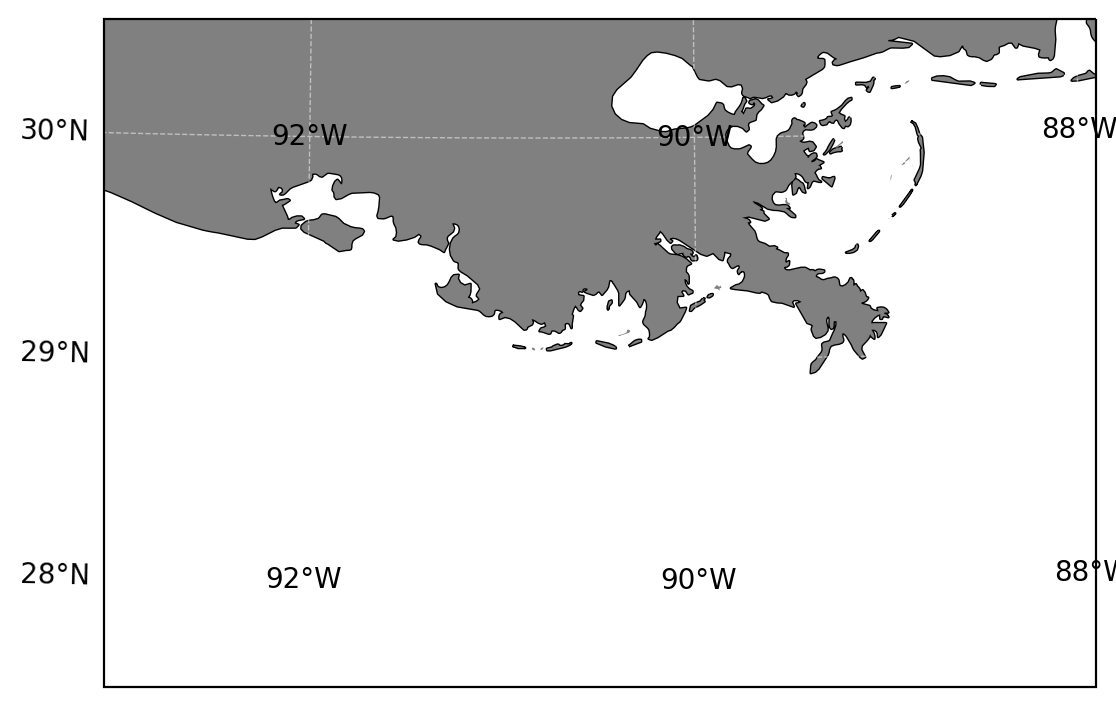

In [2]:
from satpy import Scene, find_files_and_readers
from pyresample import create_area_def
from satpy.writers import get_enhanced_image
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np
from glob import glob
from satpy import MultiScene
import cartopy.feature as cfeature
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr

######

lat_0, lon_0 = 28.5, -90.8

lat_top=30.5
lat_bot=27.5
lon_left=-88
lon_rigth=-93



extent=[lon_left, lon_rigth, lat_bot, lat_top]
resval = 1000
res = xr.DataArray(resval, attrs={"units": "meters"})

def plot_mapbase(extent=extent, res='10m', projection=ccrs.PlateCarree(), ax=None):
    if ax is None:
        fig = plt.figure(dpi=200) # set fig size
        ax = fig.add_subplot(111, projection=projection)
    ax.set_extent(extent , crs=ccrs.PlateCarree())
    ax.coastlines(res)
    ax.add_feature(cfeature.NaturalEarthFeature(category='physical', 
                                                name='land',
                                                facecolor='grey', # change color here
                                                scale=res))
    gl = ax.gridlines(crs=ccrs.PlateCarree(),
                 ylocs=[28, 29, 30], 
                 xlocs=[-94, -92, -90, -88], 
                 draw_labels=True, linewidth=0.5, color='w', alpha=0.5, linestyle='--')
    gl.right_labels = False
    gl.top_labels = False
    return ax

mapbase = plot_mapbase(projection= ccrs.LambertConformal(central_longitude=lon_0, central_latitude=lat_0))

######
        
        
def Cruisefigure(cruise, day):
    
    i=0
    base = '/home/hboi-ouri/Projects/RS_Files/Task1/' + cruise + '/' + day + '/MYD021KM.'

    #files to be used
    filenames = glob('/home/hboi-ouri/Projects/RS_Files/Task1/' + cruise + '/' + day + '/MYD021KM.*')
    swats = np.unique([f.split('.')[1] for f in filenames])
    

    #area in the figure
    extent = [-94, 27.5, -88, 30.5]
    my_area = create_area_def('my_area', {'proj': 'lcc', 'lon_0': -91., 'lat_0': 29.5, 'lat_1': 29.5, 'lat_2': 29.5},
                    width=1500, height=750,
                    area_extent=extent, units='degrees')
        
    fig =  plt.figure(figsize=(6, 4), dpi=400)

    #loop
    for swat in swats:
        dayfiles = glob(base+swat+'*')
        scn = Scene(dayfiles, reader='modis_l1b')
        scn.load(['true_color'])

        #reproject
        new_scn = scn.resample(my_area)

        #generate RGB from true color
        rgb = get_enhanced_image(new_scn['true_color'])

        #extract projection and lon lat from products
        crs = new_scn['true_color'].attrs['area'].to_cartopy_crs()
        lons, lats = new_scn['true_color'].attrs['area'].get_lonlats()

        #left true color
        ax1 = plt.subplot(projection=crs)
        rgb.data.plot.imshow(rgb='bands', transform=crs, ax=ax1)
        
        plot_mapbase(ax=ax1)


        #title & save
        ax1.set_title('MODIS AQUA - GOMEX; %s' % new_scn.start_time.isoformat()[0:10] + ', ' + new_scn.start_time.isoformat()[11:20])
        fig.text(0.035, 0.41, 'Latitude', size=13, rotation=90)
        fig.text(0.435, 0.025, 'Longitude', size=13)
        fig.savefig('/home/hboi-ouri/Projects/NASA_ProjectExp/outputs/Tasks/Task1/Swaths/' + cruise + '/Cruise%s_rgb.png' 
          % (new_scn.start_time.isoformat()[0:10] + '_' + new_scn.start_time.isoformat()[11:13] 
             + new_scn.start_time.isoformat()[14:16] 
             + new_scn.start_time.isoformat()[17:19]))
        fig.clear()

In [3]:
for number in range(1, 20):
    Cruisefigure('GOM21SU', str(number))
for number in range(1, 34):
    Cruisefigure('GOM22SU', str(number))
for number in range(1, 12):
    Cruisefigure('GOM22SP', str(number))

/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-pack

/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
/home/hboi-ouri/miniconda3/envs/Satpy/lib/python3.8/site-packages/satpy/modifiers/angles.py:502: RuntimeWarning: invalid value encountered in log
  grad_factor = 1. - np.log(grad_factor + 1) / np.log(2)
Clipping input data to the valid range for imshow with RGB data ([0..1] for fl

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>

<Figure size 2400x1600 with 0 Axes>